# Assignment: Advanced Regression

# Assignment Part-I

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know:

- Which variables are significant in predicting the price of a house, and

- How well those variables describe the price of a house.

 Also, determine the optimal value of lambda for ridge and lasso regression.
 

## Business Goal 

- Required to model the price of houses with the available independent variables. 
- This model will then be used by the management to understand how exactly the prices vary with the variables.
- They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns.
- Further, the model will be a good way for management to understand the pricing dynamics of a new market.

## Step 1: Reading and Understanding the Data

Let us first import NumPy and Pandas and read the dataset

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing all required packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error

In [3]:
# Importing dataset
house = pd.read_csv('train.csv')

# summary of the dataset:
print(house.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [4]:
# head
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
## Shape
print(house.shape)

(1460, 81)


In [6]:
## Columns having null values
print(house.isnull().any())

Id               False
MSSubClass       False
MSZoning         False
LotFrontage       True
LotArea          False
                 ...  
MoSold           False
YrSold           False
SaleType         False
SaleCondition    False
SalePrice        False
Length: 81, dtype: bool


## Step 2: Data Cleaning

Removing/Imputing NaN values in Categorical attributes

In [7]:
# check for null values in all categorical columns

house.select_dtypes(include='object').isnull().sum()[house.select_dtypes(include='object').isnull().sum()>0]

Alley           1369
MasVnrType         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [8]:
# Replace NA with None in the following columns below : 

for col in ('Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 
            'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature', 'Electrical'):
    
    house[col]=house[col].fillna('None')

Remove categorical attributes that have more than 85% data associated to one value.
- We will remove any column that has one value repeating 1241 times ((1460*85)/100 = 1241) as this column would be skewed
  to one value

In [9]:
# Drop the following columns that have more than 85% values associated to a specific value

# Method to get the column names that have count of one value more than 85%

def getHighCategoricalValueCounts():
    column = []
    categorical_columns = house.select_dtypes(include=['object'])
    for col in (categorical_columns):
        if(house[col].value_counts().max() >= 1241):
            column.append(col)
    return column

columnsToBeRemoved = getHighCategoricalValueCounts()

# Remove the columns with skewed data

house.drop(columnsToBeRemoved, axis = 1, inplace = True)

house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,0,0,0,0,None,0,2,2008,Normal,208500
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,0,0,0,0,None,0,5,2007,Normal,181500
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,0,0,0,0,None,0,9,2008,Normal,223500
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,272,0,0,0,None,0,2,2006,Abnorml,140000
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,0,0,0,0,None,0,12,2008,Normal,250000


In [10]:
# once again check for null values in all categorical columns

house.select_dtypes(include='object').isnull().sum()[house.select_dtypes(include='object').isnull().sum()>0]

Series([], dtype: int64)

No more null values in the categorical variables


Removing null values in Numerical attributes

In [11]:
# check the null values in the numerical data

house.select_dtypes(include=['int64','float']).isnull().sum()[house.select_dtypes(include=['int64','float']).isnull()
                                                                  .sum()>0]

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

In [12]:
# Impute the null values with median values for LotFrontage and MasVnrArea columns

house['LotFrontage'] = house['LotFrontage'].replace(np.nan, house['LotFrontage'].median())
house['MasVnrArea'] = house['MasVnrArea'].replace(np.nan, house['MasVnrArea'].median())

In [13]:
# Setting the null values with 0 for GarageYrBlt for now as we would be handling this column further below

house['GarageYrBlt']=house['GarageYrBlt'].fillna(0)
house['GarageYrBlt'] = house['GarageYrBlt'].astype(int)

In [14]:
# Create a new column named IsRemodelled - This column would determine whether the house has been remodelled or not based on 
# the difference between remodelled and built years

def checkForRemodel(row):
    if(row['YearBuilt'] == row['YearRemodAdd']):
        return 0
    elif(row['YearBuilt'] < row['YearRemodAdd']):
        return 1
    else:
        return 2
    
house['IsRemodelled'] = house.apply(checkForRemodel, axis=1)
house.head()    

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleCondition,SalePrice,IsRemodelled
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,0,0,0,None,0,2,2008,Normal,208500,0
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,0,0,0,None,0,5,2007,Normal,181500,0
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,0,0,0,None,0,9,2008,Normal,223500,1
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,0,0,0,None,0,2,2006,Abnorml,140000,1
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,0,0,0,None,0,12,2008,Normal,250000,0


In [15]:
# Create a new column named BuiltOrRemodelledAge and determine the age of the building at the time of selling

def getBuiltOrRemodelAge(row):
    if(row['YearBuilt'] == row['YearRemodAdd']):
        return row['YrSold'] - row['YearBuilt']
    else:
        return row['YrSold'] - row['YearRemodAdd']
       
house['BuiltOrRemodelAge'] = house.apply(getBuiltOrRemodelAge, axis=1)
house.head()  

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleCondition,SalePrice,IsRemodelled,BuiltOrRemodelAge
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,0,0,None,0,2,2008,Normal,208500,0,5
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,0,0,None,0,5,2007,Normal,181500,0,31
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,0,0,None,0,9,2008,Normal,223500,1,6
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,0,0,None,0,2,2006,Abnorml,140000,1,36
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,0,0,None,0,12,2008,Normal,250000,0,8


In [16]:
# Create a new column which would indicate if the Garage is old or new.
# Garage Yr Built less than 2000 will be considered as old (0) else new(1). 
# For GarageYrBuilt , where we have imputed the value as 0 will also be treated as old.

def getGarageConstructionPeriod(row):
    if row == 0:
        return 0
    elif row >= 1900 and row < 2000:        
        return 0
    else:   
        return 1
    
house['OldOrNewGarage'] = house['GarageYrBlt'].apply(getGarageConstructionPeriod)
house.head() 

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleCondition,SalePrice,IsRemodelled,BuiltOrRemodelAge,OldOrNewGarage
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,0,None,0,2,2008,Normal,208500,0,5,1
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,0,None,0,5,2007,Normal,181500,0,31,0
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,0,None,0,9,2008,Normal,223500,1,6,1
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,0,None,0,2,2006,Abnorml,140000,1,36,0
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,0,None,0,12,2008,Normal,250000,0,8,1


In [17]:
# Since we have created new features from YearBuilt, YearRemodAdd, YrSold and GarageYrBlt, we can drop these columns as we 
# would only be using the derived columns for further analysis

house.drop(['YearBuilt', 'YearRemodAdd', 'YrSold', 'GarageYrBlt'], axis = 1, inplace = True)

Remove numerical attributes that have more than 85% data associated to one value.
- We will remove any column that has one value repeating 1241 times (1460*85)/100 = 1241) as this column would be skewed
  to one value

In [18]:
# Drop the following columns that have more than 85% values associated to a specific value
# We will also drop MoSold as we will not be using that for further analysis

def getHighNumericalValueCounts():
    column = []
    numerical_columns = house.select_dtypes(include=['int64', 'float'])
    for col in (numerical_columns):
        if(house[col].value_counts().max() >= 1241):
            column.append(col)
    return column

columnsToBeRemoved = getHighNumericalValueCounts()
house.drop(columnsToBeRemoved, axis = 1, inplace = True)

house.drop(['MoSold'], axis = 1, inplace = True)

house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,Fence,SaleCondition,SalePrice,IsRemodelled,BuiltOrRemodelAge,OldOrNewGarage
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,2,548,0,61,None,Normal,208500,0,5,1
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,2,460,298,0,None,Normal,181500,0,31,0
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,2,608,0,42,None,Normal,223500,1,6,1
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,3,642,0,35,None,Abnorml,140000,1,36,0
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,3,836,192,84,None,Normal,250000,0,8,1


In [19]:
# check for percentage of null values in each column

percent_missing = round(100*(house.isnull().sum()/len(house.index)), 2)
print(percent_missing)

Id                   0.0
MSSubClass           0.0
MSZoning             0.0
LotFrontage          0.0
LotArea              0.0
LotShape             0.0
LotConfig            0.0
Neighborhood         0.0
BldgType             0.0
HouseStyle           0.0
OverallQual          0.0
OverallCond          0.0
RoofStyle            0.0
Exterior1st          0.0
Exterior2nd          0.0
MasVnrType           0.0
MasVnrArea           0.0
ExterQual            0.0
Foundation           0.0
BsmtQual             0.0
BsmtExposure         0.0
BsmtFinType1         0.0
BsmtFinSF1           0.0
BsmtUnfSF            0.0
TotalBsmtSF          0.0
HeatingQC            0.0
1stFlrSF             0.0
2ndFlrSF             0.0
GrLivArea            0.0
BsmtFullBath         0.0
FullBath             0.0
HalfBath             0.0
BedroomAbvGr         0.0
KitchenQual          0.0
TotRmsAbvGrd         0.0
Fireplaces           0.0
FireplaceQu          0.0
GarageType           0.0
GarageFinish         0.0
GarageCars           0.0


Hence there are no null values in the dataset

Check for Duplicates

In [20]:
# Check if there are any duplicate values in the dataset

house[house.duplicated(keep=False)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,Fence,SaleCondition,SalePrice,IsRemodelled,BuiltOrRemodelAge,OldOrNewGarage


No duplicate entries found.

Outlier Treatment

In [21]:
# Checking outliers at 25%,50%,75%,90%,95% and above

house.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,...,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice,IsRemodelled,BuiltOrRemodelAge,OldOrNewGarage
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,69.863699,10516.828082,6.099315,5.575342,103.117123,443.639726,567.240411,1057.429452,...,6.517808,0.613014,1.767123,472.980137,94.244521,46.660274,180921.195890,0.476712,22.950000,0.275342
std,421.610009,42.300571,22.027677,9981.264932,1.382997,1.112799,180.731373,456.098091,441.866955,438.705324,...,1.625393,0.644666,0.747315,213.804841,125.338794,66.256028,79442.502883,0.499629,20.640653,0.446840
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000,0.000000,-1.000000,0.000000
25%,365.750000,20.000000,60.000000,7553.500000,5.000000,5.000000,0.000000,0.000000,223.000000,795.750000,...,5.000000,0.000000,1.000000,334.500000,0.000000,0.000000,129975.000000,0.000000,4.000000,0.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,0.000000,383.500000,477.500000,991.500000,...,6.000000,1.000000,2.000000,480.000000,0.000000,25.000000,163000.000000,0.000000,14.000000,0.000000
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,164.250000,712.250000,808.000000,1298.250000,...,7.000000,1.000000,2.000000,576.000000,168.000000,68.000000,214000.000000,1.000000,41.000000,1.000000
90%,1314.100000,120.000000,92.000000,14381.700000,8.000000,7.000000,335.000000,1065.500000,1232.000000,1602.200000,...,9.000000,1.000000,3.000000,757.100000,262.000000,130.000000,278000.000000,1.000000,56.000000,1.000000
95%,1387.050000,160.000000,104.000000,17401.150000,8.000000,8.000000,456.000000,1274.000000,1468.000000,1753.000000,...,10.000000,2.000000,3.000000,850.100000,335.000000,175.050000,326100.000000,1.000000,58.000000,1.000000
99%,1445.410000,190.000000,137.410000,37567.640000,10.000000,9.000000,791.280000,1572.410000,1797.050000,2155.050000,...,11.000000,2.000000,3.000000,1002.790000,505.460000,285.820000,442567.010000,1.000000,60.000000,1.000000


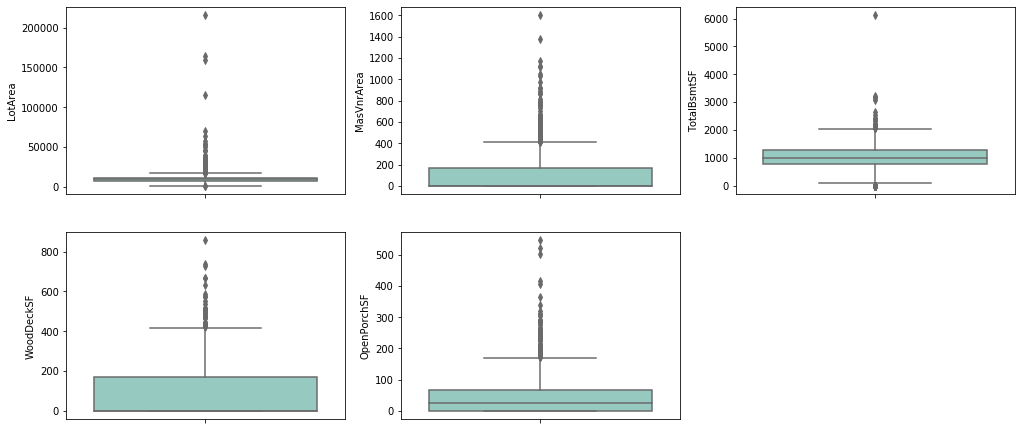

In [22]:
# Check the outliers in all the numeric columns

plt.figure(figsize=(17, 20))
plt.subplot(5,3,1)
sns.boxplot(y = 'LotArea', palette='Set3', data = house)
plt.subplot(5,3,2)
sns.boxplot(y = 'MasVnrArea', palette='Set3', data = house)
plt.subplot(5,3,3)
sns.boxplot(y = 'TotalBsmtSF', palette='Set3', data = house)
plt.subplot(5,3,4)
sns.boxplot(y = 'WoodDeckSF', palette='Set3', data = house)
plt.subplot(5,3,5)
sns.boxplot(y = 'OpenPorchSF', palette='Set3', data = house)
plt.show()

In [23]:
# Removing Outliers

# Removing values beyond 98% for LotArea

nn_quartile_LotArea = house['LotArea'].quantile(0.98)
house = house[house["LotArea"] < nn_quartile_LotArea]

# Removing values beyond 98% for MasVnrArea

nn_quartile_MasVnrArea = house['MasVnrArea'].quantile(0.98)
house = house[house["MasVnrArea"] < nn_quartile_MasVnrArea]

# Removing values beyond 99% for TotalBsmtSF

nn_quartile_TotalBsmtSF = house['TotalBsmtSF'].quantile(0.99)
house = house[house["TotalBsmtSF"] < nn_quartile_TotalBsmtSF]

# Removing values beyond 99% for WoodDeckSF

nn_quartile_WoodDeckSF = house['WoodDeckSF'].quantile(0.99)
house = house[house["WoodDeckSF"] < nn_quartile_WoodDeckSF]

# Removing values beyond 99% for OpenPorchSF

nn_quartile_OpenPorchSF = house['OpenPorchSF'].quantile(0.99)
house = house[house["OpenPorchSF"] < nn_quartile_OpenPorchSF]

In [24]:
# Determine the percentage of data retained

num_data = round(100*(len(house)/1460),2)
print(num_data)

93.01


# Step 3: Data Visualization

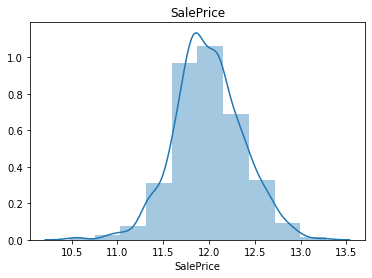

In [25]:
# Visualise the target variable -> SalePrice after transforming the sales price

house['SalePrice'] = np.log1p(house['SalePrice'])

plt.title('SalePrice')
sns.distplot(house['SalePrice'], bins=10)
plt.show()

The target value seems to be normalized with some noise.

<Figure size 720x360 with 0 Axes>

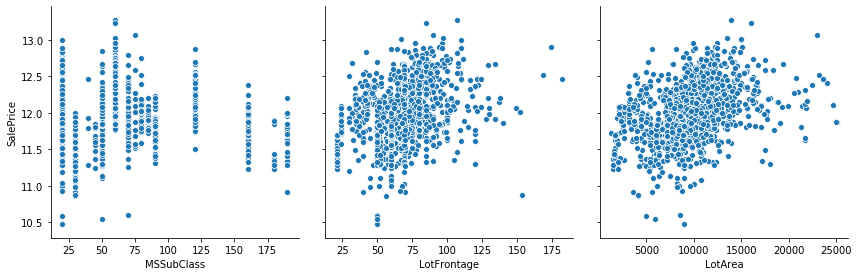

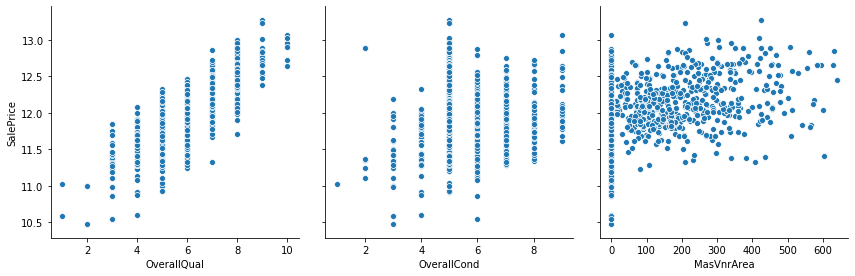

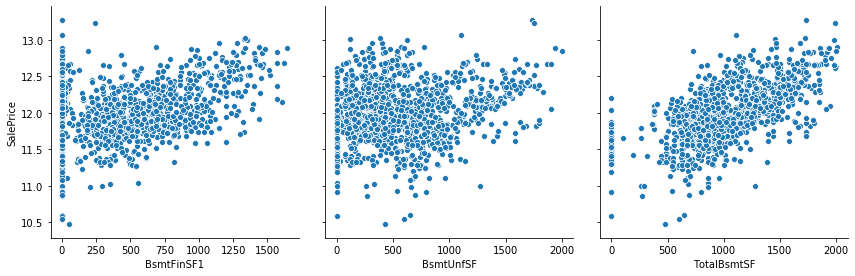

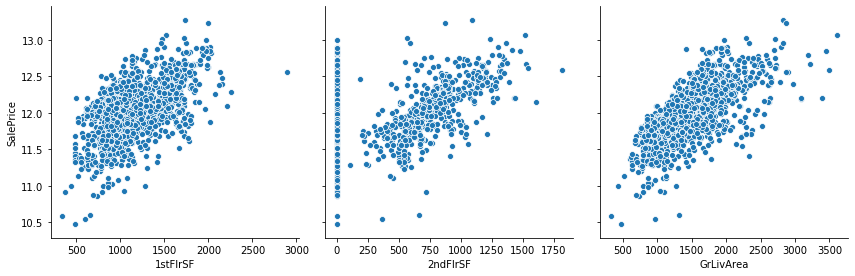

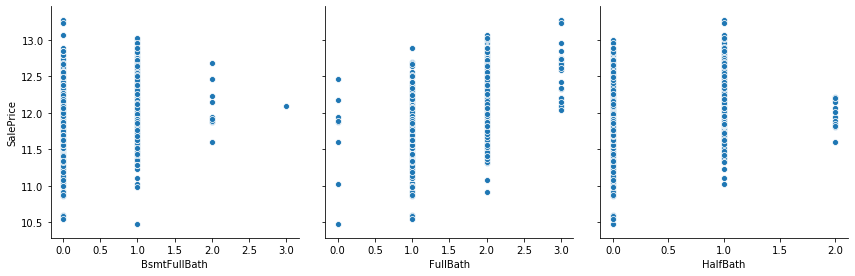

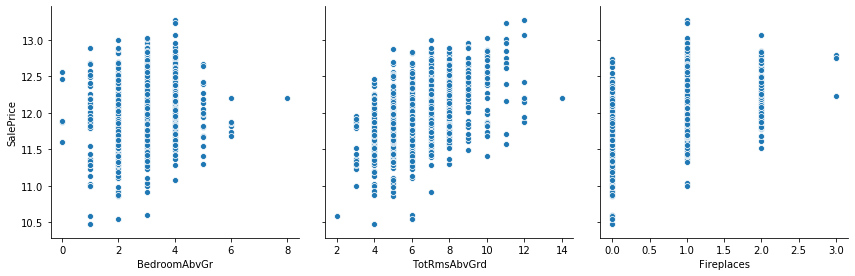

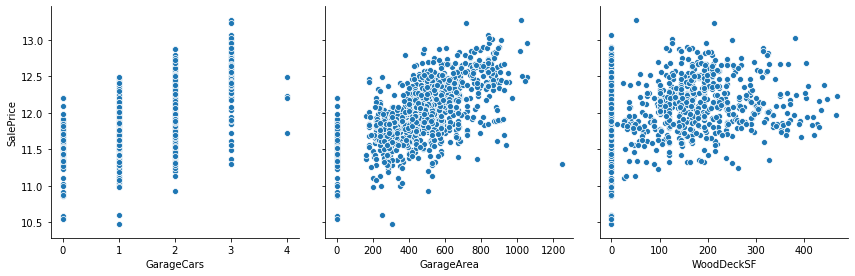

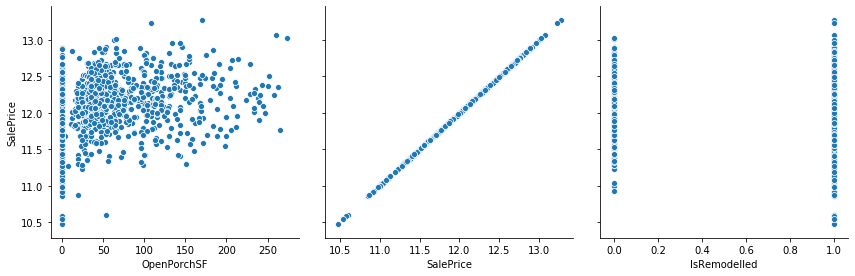

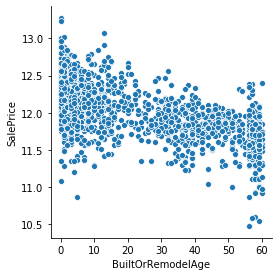

In [26]:
# Check the numerical values using pairplots

plt.figure(figsize=(10,5))
sns.pairplot(house, x_vars=['MSSubClass','LotFrontage','LotArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(house, x_vars=['OverallQual', 'OverallCond','MasVnrArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(house, x_vars=['BsmtFinSF1', 'BsmtUnfSF','TotalBsmtSF'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(house, x_vars=['1stFlrSF','2ndFlrSF', 'GrLivArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(house, x_vars=['BsmtFullBath','FullBath', 'HalfBath'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(house, x_vars=['BedroomAbvGr','TotRmsAbvGrd', 'Fireplaces'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(house, x_vars=['GarageCars','GarageArea', 'WoodDeckSF'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(house, x_vars=['OpenPorchSF','SalePrice', 'IsRemodelled'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(house, x_vars=['BuiltOrRemodelAge'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
plt.show()

Observations :

- 1stFlrSF, GrLivArea seems to be showing correlation towards right
- Rest of the variables are too scattered and hence can be understood during further analysis

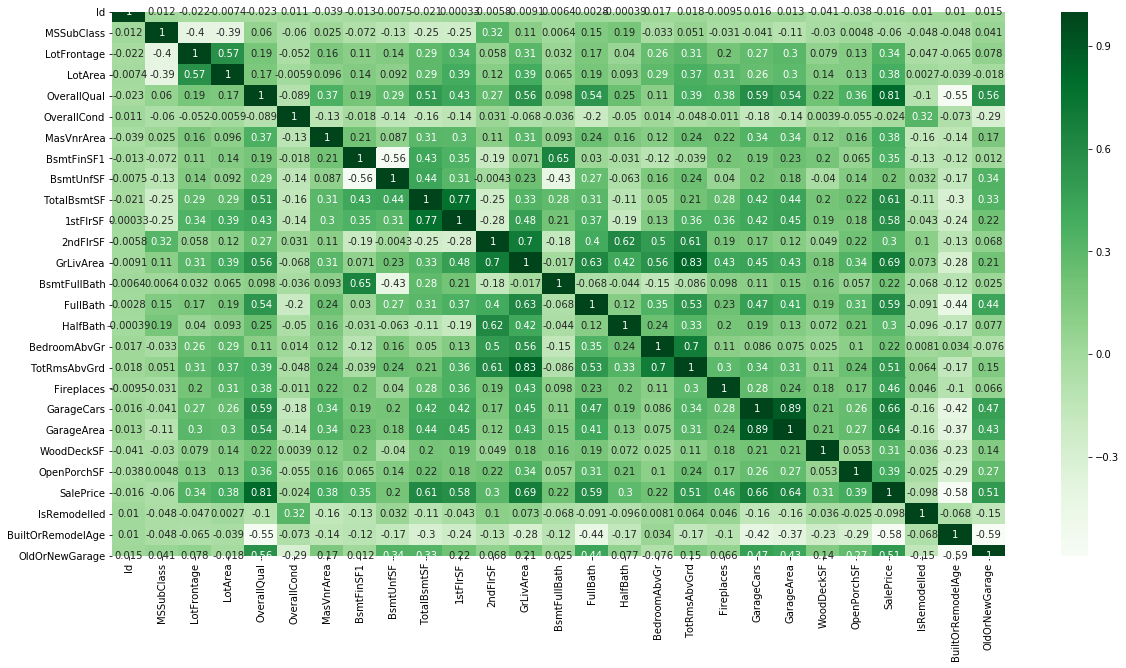

In [27]:
# Check the correlation of numerical columns

plt.figure(figsize = (20, 10))
sns.heatmap(house.corr(), annot = True, cmap="Greens")
plt.show()

Removing following columns which shows high correlation
- TotRmsAbvGrd and GrLivArea show 83%
- Garage Area and Garage Cars show 89%
Hence dropping TotRmsAbvGrd and Garage Cars

In [28]:
# Removing the highly correlated variables

house.drop(['TotRmsAbvGrd', 'GarageArea'], axis = 1, inplace = True)

In [29]:
# Check the shape of the dataframe

house.shape

(1358, 47)

# Step 4: Data Preparation

- Converting categorical data into numercal data
- Creating Dummies

In [30]:
# Since the values of the following fields are ordered list, we shall assign values to them in sequence

# For values which can be ordered, we have given an ordered sequence value
# For values which cannot be ordered, we have categorised them into 0 and 1

house['d_LotShape'] = house['LotShape'].map({'Reg': 3, 'IR1': 2, 'IR2': 1, 'IR3': 0})
house['d_ExterQual'] = house['ExterQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0 })
house['d_BsmtQual'] = house['BsmtQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
house['d_BsmtExposure'] = house['BsmtExposure'].map({'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'None': 0})
house['d_BsmtFinType1'] = house['BsmtFinType1'].map({'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 
                                                                 'None': 0})
house['d_HeatingQC'] = house['HeatingQC'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
house['d_KitchenQual'] = house['KitchenQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
house['d_FireplaceQu'] = house['FireplaceQu'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
house['d_GarageFinish'] = house['GarageFinish'].map({'Fin': 3, 'RFn': 2, 'Unf': 1, 'None': 0 })
house['d_BldgType'] = house['BldgType'].map({'Twnhs': 5, 'TwnhsE': 4, 'Duplex': 3, '2fmCon': 2, '1Fam': 1, 
                                                                 'None': 0 })
house['d_HouseStyle'] = house['HouseStyle'].map({'SLvl': 8, 'SFoyer': 7, '2.5Fin': 6, '2.5Unf': 5, '2Story': 4, 
                                                                 '1.5Fin': 3, '1.5Unf': 2, '1Story': 1, 'None': 0 })
house['d_Fence'] = house['Fence'].map({'GdPrv': 4, 'GdWo': 3, 'MnPrv': 2, 'MnWw': 1, 'None': 0 })
house['d_LotConfig'] = house['LotConfig'].map({'Inside': 5, 'Corner': 4, 'CulDSac': 3, 'FR2': 2, 'FR3': 1, 
                                                           'None': 0  })
house['d_MasVnrType'] = house['MasVnrType'].map({'BrkCmn': 1, 'BrkFace': 1, 'CBlock': 1, 'Stone': 1, 'None': 0 })
house['d_SaleCondition'] = house['SaleCondition'].map({'Normal': 1, 'Partial': 1, 'Abnorml': 0, 'Family': 0, 
                                                                   'Alloca': 0, 'AdjLand': 0, 'None': 0})
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,d_HeatingQC,d_KitchenQual,d_FireplaceQu,d_GarageFinish,d_BldgType,d_HouseStyle,d_Fence,d_LotConfig,d_MasVnrType,d_SaleCondition
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,5,4,0,2,1,4,0,5,1,1
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,5,3,3,2,1,1,0,2,0,1
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,5,4,3,2,1,4,0,5,1,1
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,4,4,4,1,1,4,0,4,0,0
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,5,4,3,2,1,4,0,2,1,1


In [31]:
# drop the old columns from which the new columns were derived
# We can also drop the id column as it will not be used any more

house = house.drop(['Id', 'LotShape', 'ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 
                                'KitchenQual', 'FireplaceQu', 'GarageFinish', 'BldgType', 'HouseStyle', 'Fence', 
                                'LotConfig', 'MasVnrType', 'SaleCondition'], axis=1)

house.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Neighborhood,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,...,d_HeatingQC,d_KitchenQual,d_FireplaceQu,d_GarageFinish,d_BldgType,d_HouseStyle,d_Fence,d_LotConfig,d_MasVnrType,d_SaleCondition
0,60,RL,65.0,8450,CollgCr,7,5,Gable,VinylSd,VinylSd,...,5,4,0,2,1,4,0,5,1,1
1,20,RL,80.0,9600,Veenker,6,8,Gable,MetalSd,MetalSd,...,5,3,3,2,1,1,0,2,0,1
2,60,RL,68.0,11250,CollgCr,7,5,Gable,VinylSd,VinylSd,...,5,4,3,2,1,4,0,5,1,1
3,70,RL,60.0,9550,Crawfor,7,5,Gable,Wd Sdng,Wd Shng,...,4,4,4,1,1,4,0,4,0,0
4,60,RL,84.0,14260,NoRidge,8,5,Gable,VinylSd,VinylSd,...,5,4,3,2,1,4,0,2,1,1


In [32]:
# For the following columns create dummies

# Creating dummies for MSZoning

d_MSZoning = pd.get_dummies(house['MSZoning'], prefix='MSZoning', drop_first = True)
house = pd.concat([house, d_MSZoning], axis = 1)

# Creating dummies for Neighborhood

d_Neighborhood = pd.get_dummies(house['Neighborhood'], prefix='Neighborhood', drop_first = True)
house = pd.concat([house, d_Neighborhood], axis = 1)

# Creating dummies for RoofStyle

d_RoofStyle = pd.get_dummies(house['RoofStyle'], prefix='RoofStyle', drop_first = True)
house = pd.concat([house, d_RoofStyle], axis = 1)

# Creating dummies for Exterior1st

d_Exterior1st = pd.get_dummies(house['Exterior1st'], prefix='Exterior1st', drop_first = True)
house = pd.concat([house, d_Exterior1st], axis = 1)

# Creating dummies for Exterior2nd

d_Exterior2nd = pd.get_dummies(house['Exterior2nd'], prefix='Exterior2nd', drop_first = True)
house = pd.concat([house, d_Exterior2nd], axis = 1)

# Creating dummies for Foundation

d_Foundation = pd.get_dummies(house['Foundation'], prefix='Foundation', drop_first = True)
house = pd.concat([house, d_Foundation], axis = 1)

# Creating dummies for GarageType

d_GarageType = pd.get_dummies(house['GarageType'], prefix='GarageType', drop_first = True)
house = pd.concat([house, d_GarageType], axis = 1)
house.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Neighborhood,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,...,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None
0,60,RL,65.0,8450,CollgCr,7,5,Gable,VinylSd,VinylSd,...,1,0,0,0,1,0,0,0,0,0
1,20,RL,80.0,9600,Veenker,6,8,Gable,MetalSd,MetalSd,...,0,0,0,0,1,0,0,0,0,0
2,60,RL,68.0,11250,CollgCr,7,5,Gable,VinylSd,VinylSd,...,1,0,0,0,1,0,0,0,0,0
3,70,RL,60.0,9550,Crawfor,7,5,Gable,Wd Sdng,Wd Shng,...,0,0,0,0,0,0,0,0,1,0
4,60,RL,84.0,14260,NoRidge,8,5,Gable,VinylSd,VinylSd,...,1,0,0,0,1,0,0,0,0,0


In [33]:
# drop the below columns as we now have new columns derived from these columns

house = house.drop(['MSZoning', 'Neighborhood', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'Foundation', 
                                'GarageType'], axis=1)

house.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None
0,60,65.0,8450,7,5,196.0,706,150,856,856,...,1,0,0,0,1,0,0,0,0,0
1,20,80.0,9600,6,8,0.0,978,284,1262,1262,...,0,0,0,0,1,0,0,0,0,0
2,60,68.0,11250,7,5,162.0,486,434,920,920,...,1,0,0,0,1,0,0,0,0,0
3,70,60.0,9550,7,5,0.0,216,540,756,961,...,0,0,0,0,0,0,0,0,1,0
4,60,84.0,14260,8,5,350.0,655,490,1145,1145,...,1,0,0,0,1,0,0,0,0,0


In [34]:
house.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1358 entries, 0 to 1458
Columns: 112 entries, MSSubClass to GarageType_None
dtypes: float64(3), int64(36), uint8(73)
memory usage: 521.2 KB


All columns in the data set are now numeric.

# Step 5: Train Test Split

In [35]:
# Putting all feature variable to X

X = house.drop(['SalePrice'], axis=1)
X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None
0,60,65.0,8450,7,5,196.0,706,150,856,856,...,1,0,0,0,1,0,0,0,0,0
1,20,80.0,9600,6,8,0.0,978,284,1262,1262,...,0,0,0,0,1,0,0,0,0,0
2,60,68.0,11250,7,5,162.0,486,434,920,920,...,1,0,0,0,1,0,0,0,0,0
3,70,60.0,9550,7,5,0.0,216,540,756,961,...,0,0,0,0,0,0,0,0,1,0
4,60,84.0,14260,8,5,350.0,655,490,1145,1145,...,1,0,0,0,1,0,0,0,0,0


In [36]:
# Putting response variable to y

y = house['SalePrice']
y.head()

0    12.247699
1    12.109016
2    12.317171
3    11.849405
4    12.429220
Name: SalePrice, dtype: float64

Scaling the features

In [37]:
# scaling the features

from sklearn.preprocessing import scale

# storing column names in cols
# scaling (the dataframe is converted to a numpy array)

cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       ...
       'Foundation_PConc', 'Foundation_Slab', 'Foundation_Stone',
       'Foundation_Wood', 'GarageType_Attchd', 'GarageType_Basment',
       'GarageType_BuiltIn', 'GarageType_CarPort', 'GarageType_Detchd',
       'GarageType_None'],
      dtype='object', length=111)

In [38]:
# split into train and test

#from sklearn.cross_validation import train_test_split
#from sklearn import train_test_split

np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size = 0.3, random_state=42)

# split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

# Step 6: Recursive feature elimination (RFE)

We will use RFE to get the best 50 features and use the new features for further analysis

In [39]:
# Running RFE with the output number of the variable equal to 50
from sklearn import preprocessing, linear_model, pipeline, metrics
from sklearn.metrics import r2_score

lm = LinearRegression()
lm.fit(X_train, y_train)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [40]:
# running RFE
rfe = RFE(lm, 50)            
rfe = rfe.fit(X_train, y_train)

In [41]:
# predict
y_train_pred = lm.predict(X_train)
y_train_pred


array([12.19899594, 11.85374768, 11.87953711, 12.19841251, 11.04710145,
       11.85029674, 11.55292365, 11.7838883 , 11.72111923, 12.23129303,
       11.71691842, 11.77420307, 12.18753681, 12.08085404, 12.36847608,
       11.35719941, 11.51057315, 12.34514322, 12.03908405, 12.14731846,
       11.82479888, 12.00170804, 12.04978905, 11.66755705, 12.46321409,
       11.84052591, 12.09368   , 12.00381051, 11.94457847, 11.55794857,
       12.17739939, 11.79869776, 12.52156506, 12.14814243, 11.66843157,
       11.71349214, 11.92261621, 11.56533524, 12.14763785, 11.48751304,
       12.67196618, 11.7917752 , 11.59124572, 11.6793284 , 12.09908557,
       11.53937219, 11.68540454, 11.75258708, 12.29649982, 12.02578575,
       11.83455034, 12.34853313, 12.02105485, 11.89073783, 12.39722024,
       11.64054153, 11.81214712, 12.11610675, 11.22770901, 11.34472104,
       12.26833782, 11.58317039, 11.94846224, 11.6949105 , 12.24720335,
       11.88771391, 11.09375574, 12.37446842, 12.236411  , 11.38

In [42]:
metrics.r2_score(y_true=y_train, y_pred=y_train_pred)

0.9231326887737111

In [43]:
# Assign the columns selected by RFE to cols

col = X_train.columns[rfe.support_]

# assign the 50 features selected using RFE to a dataframe and view them

temp_df = pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)), columns=['Variable', 'rfe_support', 'rfe_ranking'])
temp_df = temp_df.loc[temp_df['rfe_support'] == True]
temp_df.reset_index(drop=True, inplace=True)

temp_df

,Variable,rfe_support,rfe_ranking
0,LotArea,True,1
1,OverallQual,True,1
2,OverallCond,True,1
3,BsmtFinSF1,True,1
4,TotalBsmtSF,True,1
5,1stFlrSF,True,1
6,2ndFlrSF,True,1
7,GrLivArea,True,1
8,BsmtFullBath,True,1
9,FullBath,True,1


In [44]:
# Assign the 50 columns to X_train_rfe

X_train_rfe = X_train[col]

In [45]:
# Associate the new 50 columns to X_train and X_test for further analysis

X_train = X_train_rfe[X_train_rfe.columns]
X_test =  X_test[X_train.columns]

# Step 6: Model Building and Evaluation

Ridge

In [46]:
# list of alphas

params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation

folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(X_train, y_train) 


Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:    0.9s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,
                                   1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

Fitting 5 folds for each of 27 candidates

In [47]:
# display the mean scores

ridge_cv_results = pd.DataFrame(ridge_model_cv.cv_results_)
ridge_cv_results = ridge_cv_results[ridge_cv_results['param_alpha']<=500]
ridge_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
16,5,-0.077755,-0.083854,1
17,6,-0.077806,-0.083862,2
18,7,-0.077856,-0.083877,3
19,8,-0.077903,-0.083890,4
15,4,-0.077707,-0.083897,5
20,9,-0.077949,-0.083902,6
21,10,-0.077992,-0.083919,7
14,3,-0.077660,-0.083976,8
22,20,-0.078320,-0.084037,9
13,2,-0.077612,-0.084070,10


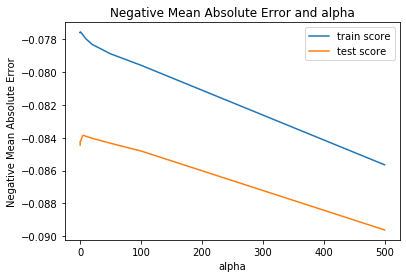

In [48]:
# plotting mean test and train scoes with alpha 

ridge_cv_results['param_alpha'] = ridge_cv_results['param_alpha'].astype('int32')

# plotting

plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_train_score'])
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [49]:
# get the best estimator for lambda

ridge_model_cv.best_estimator_

Ridge(alpha=5.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [50]:
# check the coefficient values with lambda = 5

alpha = 5
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([ 0.02247529,  0.06795649,  0.04519303,  0.02782618,  0.04555175,
        0.01495396,  0.01028191,  0.08786825,  0.01085749,  0.01053191,
        0.02007959,  0.02072325,  0.03632515,  0.00987974, -0.01170449,
       -0.01735467,  0.01442899,  0.01284615,  0.01645782,  0.00754077,
        0.01883437,  0.01632599,  0.01476   , -0.02003493,  0.01453058,
        0.06798595,  0.02715921,  0.10427926,  0.07601091,  0.02640327,
       -0.0109229 , -0.00840447,  0.02370646, -0.01507464, -0.00954319,
        0.01766504, -0.00946776, -0.01344567,  0.01272916, -0.04120739,
       -0.03176261,  0.01284558, -0.01709334,  0.03654422,  0.02135067,
        0.02175123,  0.04355618,  0.01789197,  0.00682514, -0.00945535])

In [51]:
# Check the mean squared error

mean_squared_error(y_test, ridge.predict(X_test))

0.013633610832326818

In [52]:
# Put the Features and coefficienst in a dataframe

ridge_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':ridge.coef_.round(4)})
ridge_df.reset_index(drop=True, inplace=True)
ridge_df

,Features,Coefficient
0,LotArea,0.0225
1,OverallQual,0.0680
2,OverallCond,0.0452
3,BsmtFinSF1,0.0278
4,TotalBsmtSF,0.0456
5,1stFlrSF,0.0150
6,2ndFlrSF,0.0103
7,GrLivArea,0.0879
8,BsmtFullBath,0.0109
9,FullBath,0.0105


In [53]:
# Assign the Features and their coefficient values to a dictionary which would be used while plotting the bar plot

ridge_coeff_dict = dict(pd.Series(ridge.coef_.round(4), index = X_train.columns))
ridge_coeff_dict

{'LotArea': 0.0225,
 'OverallQual': 0.068,
 'OverallCond': 0.0452,
 'BsmtFinSF1': 0.0278,
 'TotalBsmtSF': 0.0456,
 '1stFlrSF': 0.015,
 '2ndFlrSF': 0.0103,
 'GrLivArea': 0.0879,
 'BsmtFullBath': 0.0109,
 'FullBath': 0.0105,
 'HalfBath': 0.0201,
 'Fireplaces': 0.0207,
 'GarageCars': 0.0363,
 'WoodDeckSF': 0.0099,
 'IsRemodelled': -0.0117,
 'BuiltOrRemodelAge': -0.0174,
 'OldOrNewGarage': 0.0144,
 'd_BsmtQual': 0.0128,
 'd_BsmtExposure': 0.0165,
 'd_BsmtFinType1': 0.0075,
 'd_HeatingQC': 0.0188,
 'd_KitchenQual': 0.0163,
 'd_GarageFinish': 0.0148,
 'd_BldgType': -0.02,
 'd_SaleCondition': 0.0145,
 'MSZoning_FV': 0.068,
 'MSZoning_RH': 0.0272,
 'MSZoning_RL': 0.1043,
 'MSZoning_RM': 0.076,
 'Neighborhood_Crawfor': 0.0264,
 'Neighborhood_Edwards': -0.0109,
 'Neighborhood_MeadowV': -0.0084,
 'Neighborhood_NridgHt': 0.0237,
 'Neighborhood_OldTown': -0.0151,
 'Neighborhood_SWISU': -0.0095,
 'Neighborhood_StoneBr': 0.0177,
 'Exterior1st_BrkComm': -0.0095,
 'Exterior1st_CemntBd': -0.0134,
 'Exte

RFE

In [54]:
# Do an RFE to minimise the features to 15
X_train_ridge = X_train[ridge_df.Features]

lm = LinearRegression()
lm.fit(X_train_ridge, y_train)

# running RFE
rfe = RFE(lm, 15)            
rfe = rfe.fit(X_train_ridge, y_train)

In [55]:
# Method to get the coefficient values

def find(x):
    return ridge_coeff_dict[x]

# Assign top 10 features to a temp dataframe for further display in the bar plot

temp1_df = pd.DataFrame(list(zip( X_train_ridge.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
temp1_df = temp1_df.loc[temp1_df['rfe_support'] == True]
temp1_df.reset_index(drop=True, inplace=True)

temp1_df['Coefficient'] = temp1_df['Features'].apply(find)
temp1_df = temp1_df.sort_values(by=['Coefficient'], ascending=False)
temp1_df = temp1_df.head(10)
temp1_df

,Features,rfe_support,rfe_ranking,Coefficient
10,MSZoning_RL,True,1,0.1043
5,GrLivArea,True,1,0.0879
11,MSZoning_RM,True,1,0.0760
1,OverallQual,True,1,0.0680
9,MSZoning_FV,True,1,0.0680
4,TotalBsmtSF,True,1,0.0456
2,OverallCond,True,1,0.0452
14,Foundation_PConc,True,1,0.0436
7,GarageCars,True,1,0.0363
3,BsmtFinSF1,True,1,0.0278


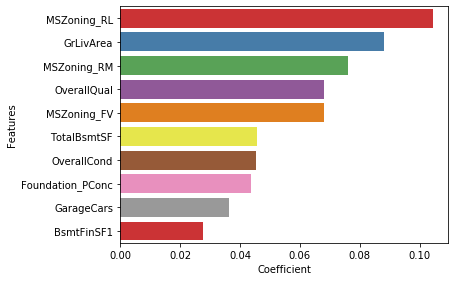

In [56]:
# bar plot to determine the variables that would affect pricing most using ridge regression

plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'Features', x='Coefficient', palette='Set1', data = temp1_df)
plt.show()

The above graph displays the top 10 variables based on the Ridge Regression model that are significant in predicting the price of a house.

In [57]:
# predict
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9194057091122796
0.9006472968947162


Lasso

In [58]:
lasso = Lasso()

# list of alphas

params = {'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.001, 0.002, 0.003, 0.004, 0.005, 0.01]}

# cross validation

folds = 5
lasso_model_cv = GridSearchCV(estimator = lasso,                         
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 11 candidates, totalling 55 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  55 out of  55 | elapsed:    0.6s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005,
                                   0.001, 0.002, 0.003, 0.004, 0.005, 0.01]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

Fitting 5 folds for each of 11 candidates, totalling 55 fits

In [59]:
# display the mean scores

lasso_cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
lasso_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
3,0.0004,-0.077845,-0.084082,1
2,0.0003,-0.077752,-0.084122,2
4,0.0005,-0.077966,-0.084124,3
1,0.0002,-0.077675,-0.084196,4
0,0.0001,-0.077606,-0.084286,5
5,0.001,-0.078658,-0.084649,6
6,0.002,-0.079585,-0.085257,7
7,0.003,-0.080151,-0.085618,8
8,0.004,-0.080639,-0.086056,9
9,0.005,-0.081208,-0.086511,10


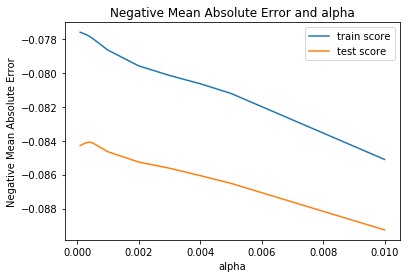

In [60]:
# plotting mean test and train scoes with alpha 

lasso_cv_results['param_alpha'] = lasso_cv_results['param_alpha'].astype('float64')

# plotting

plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_train_score'])
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [61]:
# get the best estimator for lambda

lasso_model_cv.best_estimator_

Lasso(alpha=0.0004, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [62]:
# check the coefficient values with lambda = 0.0004

alpha = 0.0004

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 
lasso.coef_


# model with optimal alpha
# lasso regression
#lm = Lasso(alpha=0.001)
#lm.fit(X_train, y_train)


array([ 0.02209   ,  0.06965615,  0.04499187,  0.02857128,  0.04617356,
        0.00589288, -0.        ,  0.10018134,  0.01012931,  0.00903681,
        0.01910648,  0.02061525,  0.03680238,  0.00969557, -0.01141099,
       -0.01760434,  0.01381252,  0.01187995,  0.01644408,  0.00693116,
        0.01831145,  0.01614689,  0.01498323, -0.01936956,  0.01447596,
        0.06889636,  0.02711608,  0.10656541,  0.07644758,  0.02578236,
       -0.01048374, -0.0078987 ,  0.02272991, -0.01484452, -0.0096969 ,
        0.01670877, -0.00927381, -0.        ,  0.01212285, -0.03116947,
       -0.02947411,  0.        , -0.01640651,  0.02694071,  0.01853022,
        0.01949665,  0.04186531,  0.01670137,  0.00626478, -0.0089319 ])

In [63]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [64]:
# predict

y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9194057091122796
0.9006472968947162


In [65]:
# Check the mean squared error

mean_squared_error(y_test, lasso.predict(X_test))

0.013468208254564643

In [66]:
# Put the shortlisted Features and coefficienst in a dataframe

lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4)})
lasso_df = lasso_df[lasso_df['Coefficient'] != 0.00]
lasso_df.reset_index(drop=True, inplace=True)
lasso_df

,Features,Coefficient
0,LotArea,0.0221
1,OverallQual,0.0697
2,OverallCond,0.0450
3,BsmtFinSF1,0.0286
4,TotalBsmtSF,0.0462
5,1stFlrSF,0.0059
6,GrLivArea,0.1002
7,BsmtFullBath,0.0101
8,FullBath,0.0090
9,HalfBath,0.0191


In [67]:
# Put the Features and Coefficients in dictionary

lasso_coeff_dict = dict(pd.Series(lasso.coef_, index = X_train.columns))
lasso_coeff_dict

{'LotArea': 0.022089999224203623,
 'OverallQual': 0.0696561509104974,
 'OverallCond': 0.04499186911162908,
 'BsmtFinSF1': 0.028571275909719095,
 'TotalBsmtSF': 0.046173555214106064,
 '1stFlrSF': 0.00589287821707483,
 '2ndFlrSF': -0.0,
 'GrLivArea': 0.10018133511162267,
 'BsmtFullBath': 0.010129306271065019,
 'FullBath': 0.0090368095005422,
 'HalfBath': 0.019106482229354464,
 'Fireplaces': 0.020615253870428053,
 'GarageCars': 0.036802382758918256,
 'WoodDeckSF': 0.009695570943808554,
 'IsRemodelled': -0.01141099402995129,
 'BuiltOrRemodelAge': -0.017604335236860075,
 'OldOrNewGarage': 0.01381252338587617,
 'd_BsmtQual': 0.01187994739930228,
 'd_BsmtExposure': 0.016444083613428136,
 'd_BsmtFinType1': 0.006931160628862921,
 'd_HeatingQC': 0.01831145337027134,
 'd_KitchenQual': 0.016146894247203846,
 'd_GarageFinish': 0.014983230938384554,
 'd_BldgType': -0.019369558316358487,
 'd_SaleCondition': 0.01447596454312684,
 'MSZoning_FV': 0.0688963581396626,
 'MSZoning_RH': 0.027116084289799544,

RFE

In [68]:
# Do an RFE to minimise the features to 15

X_train_lasso = X_train[lasso_df.Features]

lm = LinearRegression()
lm.fit(X_train_lasso, y_train)

# running RFE

rfe = RFE(lm, 15)            
rfe = rfe.fit(X_train_lasso, y_train)

In [69]:
# Method to get the coefficient values

def find(x):
    return lasso_coeff_dict[x]

# Assign top 10 features to a temp dataframe for further display in the bar plot

temp2_df = pd.DataFrame(list(zip( X_train_lasso.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
temp2_df = temp2_df.loc[temp2_df['rfe_support'] == True]
temp2_df.reset_index(drop=True, inplace=True)

temp2_df['Coefficient'] = temp2_df['Features'].apply(find)
temp2_df = temp2_df.sort_values(by=['Coefficient'], ascending=False)
temp2_df = temp2_df.head(10)
temp2_df

,Features,rfe_support,rfe_ranking,Coefficient
11,MSZoning_RL,True,1,0.106565
5,GrLivArea,True,1,0.100181
12,MSZoning_RM,True,1,0.076448
1,OverallQual,True,1,0.069656
9,MSZoning_FV,True,1,0.068896
4,TotalBsmtSF,True,1,0.046174
2,OverallCond,True,1,0.044992
14,Foundation_PConc,True,1,0.041865
7,GarageCars,True,1,0.036802
3,BsmtFinSF1,True,1,0.028571


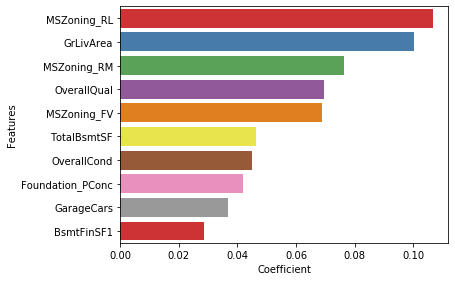

In [70]:
# bar plot to determine the variables that would affect pricing most using ridge regression

plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'Features', x='Coefficient', palette='Set1', data = temp2_df)
plt.show()

The above graph displays the top 10 variables based on the Lasso Regression model that are significant in predicting the price of a house.

# Conclusion :


The optimal lambda value in case of Ridge and Lasso is as below:

- Ridge - 5
- Lasso - 0.0004

The Mean Squared error in case of Ridge and Lasso are:

- Ridge - 0.013633610832326818
- Lasso - 0.013468208254564643

The Mean Squared Error of Lasso is slightly lower than that of Ridge.

Also, since Lasso helps in feature reduction (as the coefficient value of one of the feature became 0), Lasso has a better edge over Ridge.

Hence based on Lasso, the factors that generally affect the price are 

- MSZoning_RL
- GrLivArea
- MSZoning_RM
- OverallQual
- MSZoning_FV
- OverallQual  
- TotalBsmtSF
- OverallCond  
- Foundation_PConc
- GarageCars
- BsmtFinSF1


Therefore, the variables predicted by Lasso in the above bar chart as significant variables for predicting the price of a house.

# Q1: What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?


The current alpha value in case of Ridge and Lasso is as below:

- Ridge - 5
- Lasso - 0.0004

If we choose double the value of alpha for both ridge and lasso, the new values will become:

- Ridge - 5*2 = 10
- Lasso - 0.0004*2 = 0.0008


Ridge

In [71]:
# check the coefficient values with lambda = 10

alpha = 10
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([ 0.02239287,  0.06836485,  0.04532654,  0.02767768,  0.04533362,
        0.0237079 ,  0.02005459,  0.07625324,  0.01099668,  0.01094735,
        0.02058157,  0.02117717,  0.03591107,  0.00987019, -0.01217035,
       -0.01780087,  0.01417665,  0.01277901,  0.01630917,  0.00776765,
        0.01872641,  0.01669692,  0.01456865, -0.01972157,  0.01492893,
        0.05806234,  0.02207887,  0.08511546,  0.05883699,  0.0261742 ,
       -0.01071093, -0.00847713,  0.02315571, -0.01446403, -0.00886549,
        0.01724907, -0.00936039, -0.01056044,  0.01257372, -0.03418348,
       -0.03011869,  0.01031355, -0.01684323,  0.03000763,  0.01985691,
        0.02038818,  0.04195944,  0.01755802,  0.00602015, -0.00983821])

In [72]:
# Check the mean squared error

mean_squared_error(y_test, ridge.predict(X_test))

0.013592887428853742

In [73]:
# Put the Features and coefficienst in a dataframe

ridge_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':ridge.coef_.round(4)})
ridge_df.reset_index(drop=True, inplace=True)
ridge_df

,Features,Coefficient
0,LotArea,0.0224
1,OverallQual,0.0684
2,OverallCond,0.0453
3,BsmtFinSF1,0.0277
4,TotalBsmtSF,0.0453
5,1stFlrSF,0.0237
6,2ndFlrSF,0.0201
7,GrLivArea,0.0763
8,BsmtFullBath,0.0110
9,FullBath,0.0109


In [74]:
# Assign the Features and their coefficient values to a dictionary which would be used while plotting the bar plot

ridge_coeff_dict = dict(pd.Series(ridge.coef_.round(4), index = X_train.columns))
ridge_coeff_dict

{'LotArea': 0.0224,
 'OverallQual': 0.0684,
 'OverallCond': 0.0453,
 'BsmtFinSF1': 0.0277,
 'TotalBsmtSF': 0.0453,
 '1stFlrSF': 0.0237,
 '2ndFlrSF': 0.0201,
 'GrLivArea': 0.0763,
 'BsmtFullBath': 0.011,
 'FullBath': 0.0109,
 'HalfBath': 0.0206,
 'Fireplaces': 0.0212,
 'GarageCars': 0.0359,
 'WoodDeckSF': 0.0099,
 'IsRemodelled': -0.0122,
 'BuiltOrRemodelAge': -0.0178,
 'OldOrNewGarage': 0.0142,
 'd_BsmtQual': 0.0128,
 'd_BsmtExposure': 0.0163,
 'd_BsmtFinType1': 0.0078,
 'd_HeatingQC': 0.0187,
 'd_KitchenQual': 0.0167,
 'd_GarageFinish': 0.0146,
 'd_BldgType': -0.0197,
 'd_SaleCondition': 0.0149,
 'MSZoning_FV': 0.0581,
 'MSZoning_RH': 0.0221,
 'MSZoning_RL': 0.0851,
 'MSZoning_RM': 0.0588,
 'Neighborhood_Crawfor': 0.0262,
 'Neighborhood_Edwards': -0.0107,
 'Neighborhood_MeadowV': -0.0085,
 'Neighborhood_NridgHt': 0.0232,
 'Neighborhood_OldTown': -0.0145,
 'Neighborhood_SWISU': -0.0089,
 'Neighborhood_StoneBr': 0.0172,
 'Exterior1st_BrkComm': -0.0094,
 'Exterior1st_CemntBd': -0.0106,
 

RFE

In [75]:
# Do an RFE to minimise the features to 15
X_train_ridge = X_train[ridge_df.Features]

lm = LinearRegression()
lm.fit(X_train_ridge, y_train)

# running RFE
rfe = RFE(lm, 15)            
rfe = rfe.fit(X_train_ridge, y_train)

In [76]:
# Method to get the coefficient values

def find(x):
    return ridge_coeff_dict[x]

# Assign top 10 features to a temp dataframe for further display in the bar plot

temp1_df = pd.DataFrame(list(zip( X_train_ridge.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
temp1_df = temp1_df.loc[temp1_df['rfe_support'] == True]
temp1_df.reset_index(drop=True, inplace=True)

temp1_df['Coefficient'] = temp1_df['Features'].apply(find)
temp1_df = temp1_df.sort_values(by=['Coefficient'], ascending=False)
temp1_df = temp1_df.head(10)
temp1_df

,Features,rfe_support,rfe_ranking,Coefficient
10,MSZoning_RL,True,1,0.0851
5,GrLivArea,True,1,0.0763
1,OverallQual,True,1,0.0684
11,MSZoning_RM,True,1,0.0588
9,MSZoning_FV,True,1,0.0581
2,OverallCond,True,1,0.0453
4,TotalBsmtSF,True,1,0.0453
14,Foundation_PConc,True,1,0.0420
7,GarageCars,True,1,0.0359
3,BsmtFinSF1,True,1,0.0277


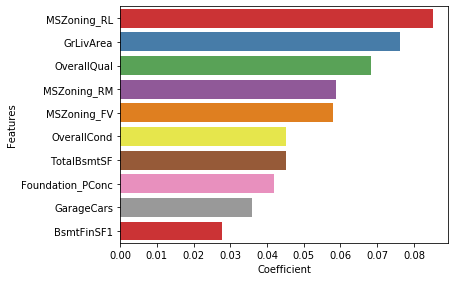

In [77]:
# bar plot to determine the variables that would affect pricing most using ridge regression

plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'Features', x='Coefficient', palette='Set1', data = temp1_df)
plt.show()

Lasso

In [78]:
# check the coefficient values with lambda = 0.0008

alpha = 0.0008

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 
lasso.coef_

array([ 0.02150854,  0.07256786,  0.04533959,  0.02938697,  0.04603938,
        0.00709373,  0.        ,  0.09916138,  0.00969521,  0.0084598 ,
        0.01931003,  0.02115922,  0.03657018,  0.00952996, -0.01200397,
       -0.01853113,  0.01279895,  0.01047941,  0.0159526 ,  0.00663218,
        0.01782859,  0.01613116,  0.01485171, -0.01835757,  0.01508635,
        0.05400228,  0.01895238,  0.07806276,  0.04946467,  0.02503558,
       -0.00961313, -0.00687127,  0.02109952, -0.01368065, -0.00896623,
        0.01539236, -0.00891403, -0.        ,  0.00864296, -0.01054086,
       -0.02507148,  0.        , -0.01281146,  0.00742324,  0.01373469,
        0.01552661,  0.03830161,  0.01494745,  0.00459249, -0.00902218])

In [79]:
# Check the mean squared error

mean_squared_error(y_test, lasso.predict(X_test))

0.013268113701371981

In [80]:
# Put the shortlisted Features and coefficienst in a dataframe

lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4)})
lasso_df = lasso_df[lasso_df['Coefficient'] != 0.00]
lasso_df.reset_index(drop=True, inplace=True)
lasso_df

,Features,Coefficient
0,LotArea,0.0215
1,OverallQual,0.0726
2,OverallCond,0.0453
3,BsmtFinSF1,0.0294
4,TotalBsmtSF,0.0460
5,1stFlrSF,0.0071
6,GrLivArea,0.0992
7,BsmtFullBath,0.0097
8,FullBath,0.0085
9,HalfBath,0.0193


In [81]:
# Put the Features and Coefficients in dictionary

lasso_coeff_dict = dict(pd.Series(lasso.coef_, index = X_train.columns))
lasso_coeff_dict

{'LotArea': 0.02150853948436635,
 'OverallQual': 0.07256786086561862,
 'OverallCond': 0.04533958750616383,
 'BsmtFinSF1': 0.029386969321063446,
 'TotalBsmtSF': 0.04603938121490018,
 '1stFlrSF': 0.007093728082999403,
 '2ndFlrSF': 0.0,
 'GrLivArea': 0.09916137623140865,
 'BsmtFullBath': 0.00969521138764126,
 'FullBath': 0.008459797839127214,
 'HalfBath': 0.019310029905180683,
 'Fireplaces': 0.021159223980101793,
 'GarageCars': 0.036570179959686415,
 'WoodDeckSF': 0.009529955062844084,
 'IsRemodelled': -0.012003966926229933,
 'BuiltOrRemodelAge': -0.0185311279399216,
 'OldOrNewGarage': 0.012798950538828768,
 'd_BsmtQual': 0.010479406462328698,
 'd_BsmtExposure': 0.01595259734779915,
 'd_BsmtFinType1': 0.0066321763195783265,
 'd_HeatingQC': 0.01782859090260315,
 'd_KitchenQual': 0.016131162229984515,
 'd_GarageFinish': 0.014851707486547109,
 'd_BldgType': -0.018357567848168683,
 'd_SaleCondition': 0.015086345912940188,
 'MSZoning_FV': 0.054002283821877224,
 'MSZoning_RH': 0.018952384171294

RFE

In [82]:
# Do an RFE to minimise the features to 15

X_train_lasso = X_train[lasso_df.Features]

lm = LinearRegression()
lm.fit(X_train_lasso, y_train)

# running RFE

rfe = RFE(lm, 15)            
rfe = rfe.fit(X_train_lasso, y_train)

In [83]:
# Method to get the coefficient values

def find(x):
    return lasso_coeff_dict[x]

# Assign top 10 features to a temp dataframe for further display in the bar plot

temp2_df = pd.DataFrame(list(zip( X_train_lasso.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
temp2_df = temp2_df.loc[temp2_df['rfe_support'] == True]
temp2_df.reset_index(drop=True, inplace=True)

temp2_df['Coefficient'] = temp2_df['Features'].apply(find)
temp2_df = temp2_df.sort_values(by=['Coefficient'], ascending=False)
temp2_df = temp2_df.head(10)
temp2_df

,Features,rfe_support,rfe_ranking,Coefficient
5,GrLivArea,True,1,0.099161
11,MSZoning_RL,True,1,0.078063
1,OverallQual,True,1,0.072568
9,MSZoning_FV,True,1,0.054002
12,MSZoning_RM,True,1,0.049465
4,TotalBsmtSF,True,1,0.046039
2,OverallCond,True,1,0.045340
14,Foundation_PConc,True,1,0.038302
7,GarageCars,True,1,0.036570
3,BsmtFinSF1,True,1,0.029387


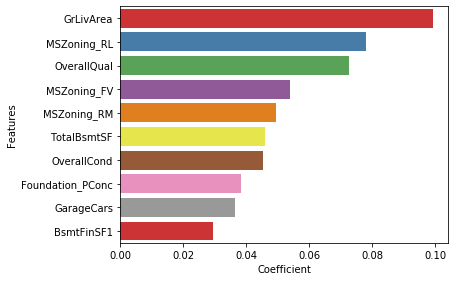

In [84]:
# bar plot to determine the variables that would affect pricing most using ridge regression

plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'Features', x='Coefficient', palette='Set1', data = temp2_df)
plt.show()

The ten most important predictor variables after the change is implemented remains same, but some variables changed their place in plot graph.